## Testing Arduino / BeagleBone monitoring

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
T = 160
dt = 1/5000
N = int(T/dt)
f0 = 550


timeline = np.arange(0, T, dt)

high = 1
low =  0

a1 = high*np.ones(int(N/5))
a2 = np.linspace(high, low, int(N/10)) 
a3 = low*np.ones(int(N/5)) 
a4 = np.linspace(low, high, int(N/5))
a5 = high*np.ones(int(N/5))
a6 = np.zeros(int(N/10))

amp = np.concatenate([a1, a2, a3, a4, a5, a6])

signal = amp * np.sin(2*np.pi*f0*timeline) + 2 

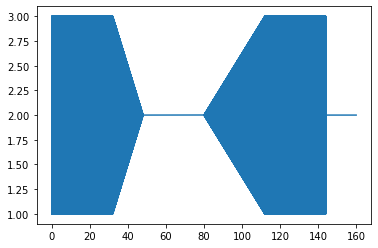

In [14]:
plt.plot(timeline, signal)

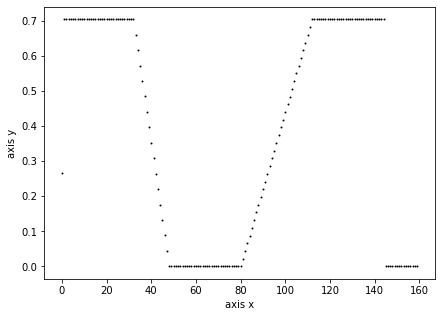

In [60]:
from andbro__livePlot import live_plot

evaluating = 5000
sigma_threshold = 0.1

average = [] 
sigma = []

array = np.zeros(int(f0/10))

times = timeline[::evaluating]



for i in range(N): 
    
    array = np.delete(array, (0), axis=0)
    array = np.append(array, signal[i])
    
    if i%evaluating == 0:
        sigma.append(np.std(array))
        average.append(np.mean(array))
        
        live_plot(np.arange(len(sigma)), sigma)

#         if np.std(array) < sigma_threshold:
#             print('Alarm')

In [ ]:
times = timeline[::evaluating]

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].scatter(times, average, color='k', s=0.2)
ax[1].scatter(times, sigma, color='k', s=0.2)